In [1]:
# Data processing
import numpy as np
import pandas as pd
import xarray as xr
import iris
import iris.pandas
from iris.experimental import stratify
from iris.analysis import trajectory
import warnings
warnings.filterwarnings('ignore', module='iris')
from pathlib import Path
import dateutil.parser
from datetime import datetime, timedelta
# Visualization
import cartopy.util
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
# Parameters
plt.rcParams['mathtext.default'] = 'regular'
M_air = 28.97 # dry air [kg]
# Convert mass mixing ratio to volume mixing ratio
coeff_c2h6 = (M_air/30.0690)*1e12 # Ethane_WAS
coeff_c3h8 = (M_air/44.0956)*1e12 # Propane_WAS
coeff_nc4h10 = (M_air/58.1222)*1e12 # n-Butane_WAS
coeff_nc5h12 = (M_air/72.1488)*1e12 # n-Pentane_WAS
coeff_ic5h12 = (M_air/72.1488)*1e12 # i-Pentane_WAS
coeff_meono2 = (M_air/77.0394)*1e12 # MeONO2_WAS
coeff_sbuono2 = (M_air/119.1192)*1e12 # 2-BuONO2_WAS or sBuONO2
coeff_n2peono2 = (M_air/133.1457)*1e12 # 2-PenONO2_WAS or n2PeONO2 or nPeBONO2
coeff_n3peono2 = (M_air/133.1457)*1e12 # 3-PenONO2_WAS or n3PeONO2 or nPeCONO2
coeff_ipeono2 = (M_air/133.1457)*1e12 # 3-Methyl-2-BuONO2_WAS or iPeONO2 or iPeBONO2

coeff_o3 = (M_air/48.00)*1e9
# Plotting
savefig = False

In [2]:
# Read UKCA NetCDF files (takes some time)
ukca_run_name = 'xnvtc'
fname_ukca_run = 'xnvtc_o3.nc'
path_to_ukca_run = Path('../data') / ukca_run_name
cb_o3 = iris.load_cube(str(path_to_ukca_run / fname_ukca_run))
# # Load altitude coordinate
# alt_coord = iris.load_cube(str(Path('../data')/'ukca_coords_n96e_marcus_180705.nc'),'mass_fraction_of_ozone_in_air').coord('altitude')

In [3]:
cb_o3

Mass Fraction Of Ozone In Air (kg kg-1),time,model_level_number,latitude,longitude
Shape,60,60,73,96
Dimension coordinates,,,,
time,x,-,-,-
model_level_number,-,x,-,-
latitude,-,-,x,-
longitude,-,-,-,x
Auxiliary coordinates,,,,
forecast_period,x,-,-,-
level_height,-,x,-,-
sigma,-,x,-,-


In [4]:
print(cb_o3.cell_methods)

(CellMethod(method='mean', coord_names=('time',), intervals=('1 hour',), comments=()),)


In [5]:
str_o3 = '$O_3$'
mp_cf_kwargs = dict(transform=ccrs.PlateCarree(), cmap='Oranges')

In [6]:
cyclic_o3, cyclic_lons = cartopy.util.add_cyclic_point(cb_o3.data*coeff_o3, coord=cb_o3.coord('longitude').points)

/local/mwe14avu/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


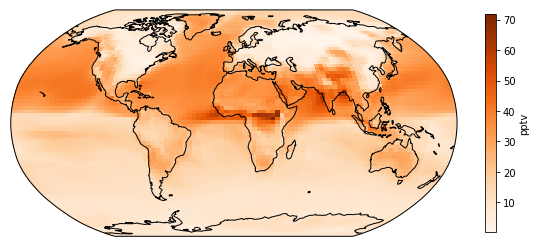

In [7]:
# Plot sampling locations and model surface concentration (hybrid height level 0)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)), facecolor='w')
p1 = ax.pcolormesh(cyclic_lons, cb_o3.coord('latitude').points, cyclic_o3[0,0,...], **mp_cf_kwargs);
ax.coastlines();
ax.set_global();
# ax.set_title(f'{str_o3}\nATom '+atom_date.strftime('%B %Y')+f'\nUKCA {ukca_run_name} '+ukca_date.strftime('%B %Y')+' (mean) surface');
fig.colorbar(p1, shrink=0.4, label='pptv');